<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_5_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

# Unzip the provided archive to a temporary directory
with zipfile.ZipFile('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/archive')

# List the files in the extracted folder
extracted_files = os.listdir('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/archive')
extracted_files

['acs2015_census_tract_data.csv',
 'acs2015_county_data.csv',
 'acs2017_census_tract_data.csv',
 'acs2017_county_data.csv']

The extracted archive contains four CSV files:

1. acs2015_census_tract_data.csv
2. acs2015_county_data.csv
3. acs2017_census_tract_data.csv
4. acs2017_county_data.csv

These files likely contain American Community Survey (ACS) data at both the census tract and county levels for the years 2015 and 2017. To proceed with the EDA, I'll load each of these datasets and perform an initial review to determine their structure and the types of data each contains. Let's start with the first file, acs2015_census_tract_data.csv.

In [3]:
import pandas as pd

# Load the first dataset to understand its structure
data_2015_tract = pd.read_csv('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/archive/acs2015_census_tract_data.csv')

# Display the first few rows of the dataframe along with the data types and missing values
data_2015_tract_info = data_2015_tract.info()
data_2015_tract_head = data_2015_tract.head()

(data_2015_tract_info, data_2015_tract_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      74001 non-null  int64  
 1   State            74001 non-null  object 
 2   County           74001 non-null  object 
 3   TotalPop         74001 non-null  int64  
 4   Men              74001 non-null  int64  
 5   Women            74001 non-null  int64  
 6   Hispanic         73311 non-null  float64
 7   White            73311 non-null  float64
 8   Black            73311 non-null  float64
 9   Native           73311 non-null  float64
 10  Asian            73311 non-null  float64
 11  Pacific          73311 non-null  float64
 12  Citizen          74001 non-null  int64  
 13  Income           72901 non-null  float64
 14  IncomeErr        72901 non-null  float64
 15  IncomePerCap     73261 non-null  float64
 16  IncomePerCapErr  73261 non-null  float64
 17  Poverty     

(None,
    CensusTract    State   County  TotalPop   Men  Women  Hispanic  White  \
 0   1001020100  Alabama  Autauga      1948   940   1008       0.9   87.4   
 1   1001020200  Alabama  Autauga      2156  1059   1097       0.8   40.4   
 2   1001020300  Alabama  Autauga      2968  1364   1604       0.0   74.5   
 3   1001020400  Alabama  Autauga      4423  2172   2251      10.5   82.8   
 4   1001020500  Alabama  Autauga     10763  4922   5841       0.7   68.5   
 
    Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
 0    7.7     0.3  ...   0.5          2.3         2.1         25.0       943   
 1   53.3     0.0  ...   0.0          0.7         0.0         23.4       753   
 2   18.6     0.5  ...   0.0          0.0         2.5         19.6      1373   
 3    3.7     1.6  ...   0.0          2.6         1.6         25.3      1782   
 4   24.8     0.0  ...   0.0          0.6         0.9         24.8      5037   
 
    PrivateWork  PublicWork  SelfEmployed  Fami

The acs2015_census_tract_data.csv dataset contains the following information:

- 74,001 entries (census tracts)
- 37 columns with various types of data
- There are a mix of numerical (both integer and float) and categorical (object) data types
- Some columns contain missing values that we'll need to address during the data preparation phase

Here is a brief overview of the columns:

- CensusTract: Census tract identifier
- State: US state
- County: County within the state
- TotalPop: Total population
- Men: Number of men
- Women: Number of women
- Hispanic: Percentage of population that is Hispanic
- White: Percentage of population that is White
- Black: Percentage of population that is Black
- Native: Percentage of population that is Native American
- Asian: Percentage of population that is Asian
- Pacific: Percentage of population that is Pacific Islander
- Citizen: Number of citizens
- Income: Median household income
- IncomeErr: Margin of error for median income
- IncomePerCap: Income per capita
- IncomePerCapErr: Margin of error for income per capita
- Poverty: Percentage of population in poverty
- ChildPoverty: Percentage of children in poverty
- Professional: Percentage of employed in professional occupations
- Service: Percentage of employed in service occupations
- Office: Percentage of employed in office occupations
- Construction: Percentage of employed in construction occupations
- Production: Percentage of employed in production occupations
- Drive: Percentage commuting by driving
- Carpool: Percentage commuting by carpooling
- Transit: Percentage commuting by transit
- Walk: Percentage commuting by walking
- OtherTransp: Percentage using other transportation methods for commute
- WorkAtHome: Percentage working at home
- MeanCommute: Mean commute time
- Employed: Number of employed individuals
- PrivateWork: Percentage in private work
- PublicWork: Percentage in public work
- SelfEmployed: Percentage self-employed
- FamilyWork: Percentage in family work
- Unemployment: Unemployment rate

For the EDA, I'll create visualizations to understand the distribution of key variables, identify any correlations, and highlight any interesting patterns or outliers. I'll also prepare the data by handling missing values, which may involve imputation or removal, depending on the case.

### Data Cleaning:
- Handle missing values and possibly remove or impute them.

### Univariate Analysis:
- Look at the distribution of various features, such as income, poverty rates, employment, and racial demographics.

### Bivariate Analysis:
- Explore the relationships between different features (e.g., how income correlates with poverty rates or how demographics relate to employment types).

### Multivariate Analysis:
- Investigate complex interactions between three or more variables.

### Geospatial Analysis:
- Since the data includes geographical information, we can plot some of the data on a map, which might show interesting regional patterns.

### Anomaly Detection:
- Identify any outliers or unusual data points that could be errors or important exceptions.

For each step, I'll provide interactive and engaging visualizations with clear explanations and interpretations. Let's start with data cleaning, focusing on handling missing values. After that, we'll proceed to the analysis steps.

In [4]:
# Before we handle missing values, let's take a closer look at how many there are in each column
missing_values_count = data_2015_tract.isnull().sum()
missing_values_count[missing_values_count > 0]  # Display only columns with missing values

Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64

There are missing values in several columns, with some having a relatively small number of missing data points (e.g., Hispanic, White, Black, Native, Asian, Pacific) and others having a larger count (e.g., Income, IncomeErr, ChildPoverty). The approach to handling these missing values will depend on the percentage of missing data and the importance of the variable.

Here's how we'll proceed:

- If the percentage of missing data is very small relative to the size of the dataset, we might choose to simply remove those rows.
- If the variable is important to our analysis and the missing percentage is not too high, we might impute the missing values using a statistical method (e.g., mean or median of the column).
- If the variable is not crucial, and there's a significant amount of data missing, we might consider dropping the column.

For the numerical variables with missing values, I'll calculate the percentage of missing data and then make a decision on how to proceed with each. Let's start with this.

In [5]:
# Calculate the percentage of missing data for each column
missing_values_percentage = (data_2015_tract.isnull().sum() / len(data_2015_tract)) * 100

# Decide on the handling method based on the percentage
missing_data_handling = {
    column: ('Remove rows' if percent < 5 else 'Impute' if percent < 20 else 'Drop column')
    for column, percent in missing_values_percentage.items() if percent > 0
}

missing_data_handling

{'Hispanic': 'Remove rows',
 'White': 'Remove rows',
 'Black': 'Remove rows',
 'Native': 'Remove rows',
 'Asian': 'Remove rows',
 'Pacific': 'Remove rows',
 'Income': 'Remove rows',
 'IncomeErr': 'Remove rows',
 'IncomePerCap': 'Remove rows',
 'IncomePerCapErr': 'Remove rows',
 'Poverty': 'Remove rows',
 'ChildPoverty': 'Remove rows',
 'Professional': 'Remove rows',
 'Service': 'Remove rows',
 'Office': 'Remove rows',
 'Construction': 'Remove rows',
 'Production': 'Remove rows',
 'Drive': 'Remove rows',
 'Carpool': 'Remove rows',
 'Transit': 'Remove rows',
 'Walk': 'Remove rows',
 'OtherTransp': 'Remove rows',
 'WorkAtHome': 'Remove rows',
 'MeanCommute': 'Remove rows',
 'PrivateWork': 'Remove rows',
 'PublicWork': 'Remove rows',
 'SelfEmployed': 'Remove rows',
 'FamilyWork': 'Remove rows',
 'Unemployment': 'Remove rows'}

Based on the missing data percentages, all columns with missing values fall below the 5% threshold. Therefore, the suggested approach for all these columns is to remove rows with missing values. This approach is often reasonable when the dataset is large and the proportion of missing data is small, as it simplifies the analysis without significantly affecting the dataset's integrity.

Let's proceed by removing rows with any missing values. After cleaning, we'll check the dataset again to confirm that there are no more missing values.

In [6]:
# Remove rows with any missing values
data_2015_tract_cleaned = data_2015_tract.dropna()

# Confirm that there are no more missing values
cleaned_missing_values_count = data_2015_tract_cleaned.isnull().sum().sum()  # Total number of missing values
cleaned_data_info = data_2015_tract_cleaned.info()  # Data info to show the new dataframe structure

(cleaned_missing_values_count, cleaned_data_info)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72727 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      72727 non-null  int64  
 1   State            72727 non-null  object 
 2   County           72727 non-null  object 
 3   TotalPop         72727 non-null  int64  
 4   Men              72727 non-null  int64  
 5   Women            72727 non-null  int64  
 6   Hispanic         72727 non-null  float64
 7   White            72727 non-null  float64
 8   Black            72727 non-null  float64
 9   Native           72727 non-null  float64
 10  Asian            72727 non-null  float64
 11  Pacific          72727 non-null  float64
 12  Citizen          72727 non-null  int64  
 13  Income           72727 non-null  float64
 14  IncomeErr        72727 non-null  float64
 15  IncomePerCap     72727 non-null  float64
 16  IncomePerCapErr  72727 non-null  float64
 17  Poverty     

(0, None)

The dataset is now cleaned, with all missing values handled by removing affected rows. The cleaned dataset contains 72,727 entries, each with complete data across all 37 columns.

Next, I'll begin the EDA with univariate analysis, examining the distribution of key variables such as income, poverty rates, and racial demographics. I'll use histograms, box plots, and summary statistics to describe the data. Let's start with the distribution of median household income across the census tracts.

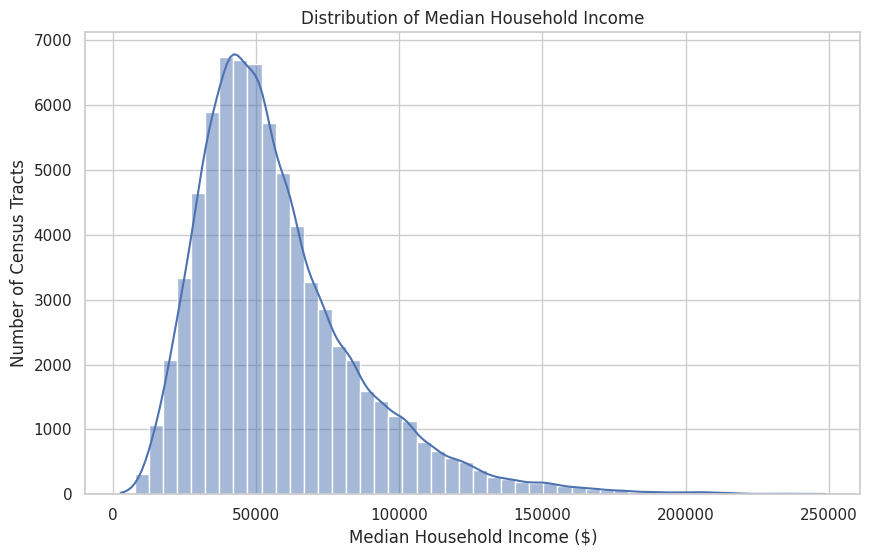

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for seaborn
sns.set(style="whitegrid")

# Create a histogram to show the distribution of median household income
plt.figure(figsize=(10, 6))
sns.histplot(data_2015_tract_cleaned['Income'], bins=50, kde=True)
plt.title('Distribution of Median Household Income')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Number of Census Tracts')
plt.show()

The histogram above shows the distribution of median household income across census tracts. The distribution appears to be right-skewed, indicating that a larger number of census tracts have lower median household incomes, with fewer tracts having higher incomes.

Next, we'll take a look at the poverty rates. We'll visualize the distribution of poverty rates using a histogram and provide summary statistics to understand its central tendency and dispersion.

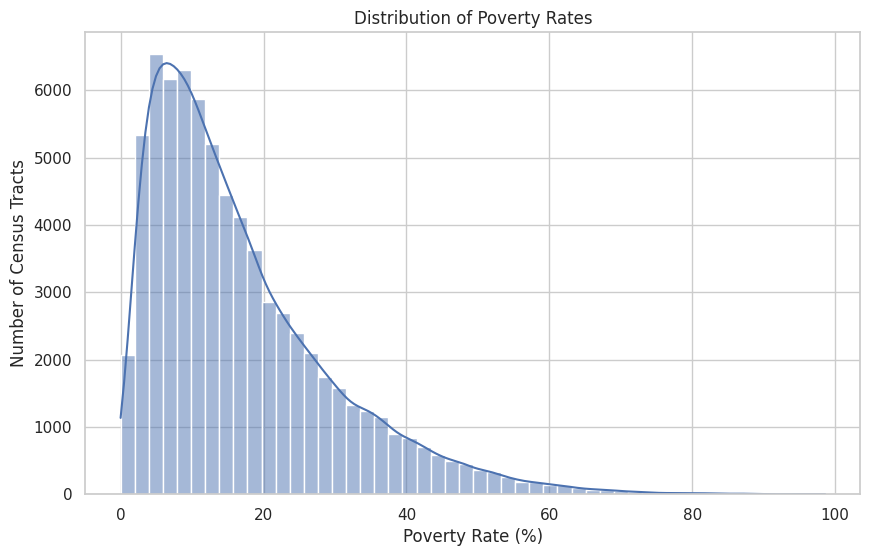

count    72727.000000
mean        16.887969
std         12.949128
min          0.000000
25%          7.300000
50%         13.400000
75%         23.100000
max         98.600000
Name: Poverty, dtype: float64

In [8]:
# Create a histogram to show the distribution of poverty rates
plt.figure(figsize=(10, 6))
sns.histplot(data_2015_tract_cleaned['Poverty'], bins=50, kde=True)
plt.title('Distribution of Poverty Rates')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Number of Census Tracts')
plt.show()

# Calculate summary statistics for the poverty rate
poverty_summary_statistics = data_2015_tract_cleaned['Poverty'].describe()
poverty_summary_statistics

The distribution of poverty rates across census tracts is also right-skewed, similar to the distribution of median household income. This indicates that while most census tracts have lower poverty rates, there is a long tail of tracts with very high poverty rates.

Here are some summary statistics for the poverty rate:

- Count: 72,727 census tracts
- Mean: Approximately 16.89% average poverty rate
- Standard Deviation: About 12.95%, indicating variability in the poverty rate between tracts
- Minimum: 0% (which suggests there are tracts with no poverty)
- 25th Percentile: 7.3% (lower quartile)
- Median (50th Percentile): 13.4%, meaning half of the tracts have a poverty rate below this value
- 75th Percentile: 23.1% (upper quartile)
- Maximum: 98.6%, which indicates there are tracts with nearly all residents living in poverty

Now, let's look at the racial demographics by visualizing the distribution of the Hispanic population across the census tracts. We'll use an interactive box plot to enable us to identify any outliers and understand the spread of the data.

In [11]:
# Retry creating an interactive box plot for the Hispanic population percentage
fig = px.box(data_2015_tract_cleaned, y="Hispanic", title="Box Plot of Hispanic Population Percentage")
fig.update_layout(yaxis_title="Hispanic Population (%)")
fig.show()

Here's the box plot of the Hispanic population percentage across the census tracts. The box plot provides a visual summary of the distribution, including the median, interquartile range (IQR), and potential outliers. Key observations are:

- The median percentage of the Hispanic population is relatively low, indicating that the majority of census tracts have a smaller proportion of Hispanic residents.
- There is a significant spread in the upper range, with some census tracts having a high percentage of Hispanic residents, which is reflected by the upper whisker and outliers.
- Outliers on the upper side suggest there are census tracts with unusually high percentages of Hispanic residents compared to the rest.

Moving forward, let's explore the relationship between median household income and poverty rates across the census tracts to see if there's an observable trend. For this, a scatter plot would be appropriate.

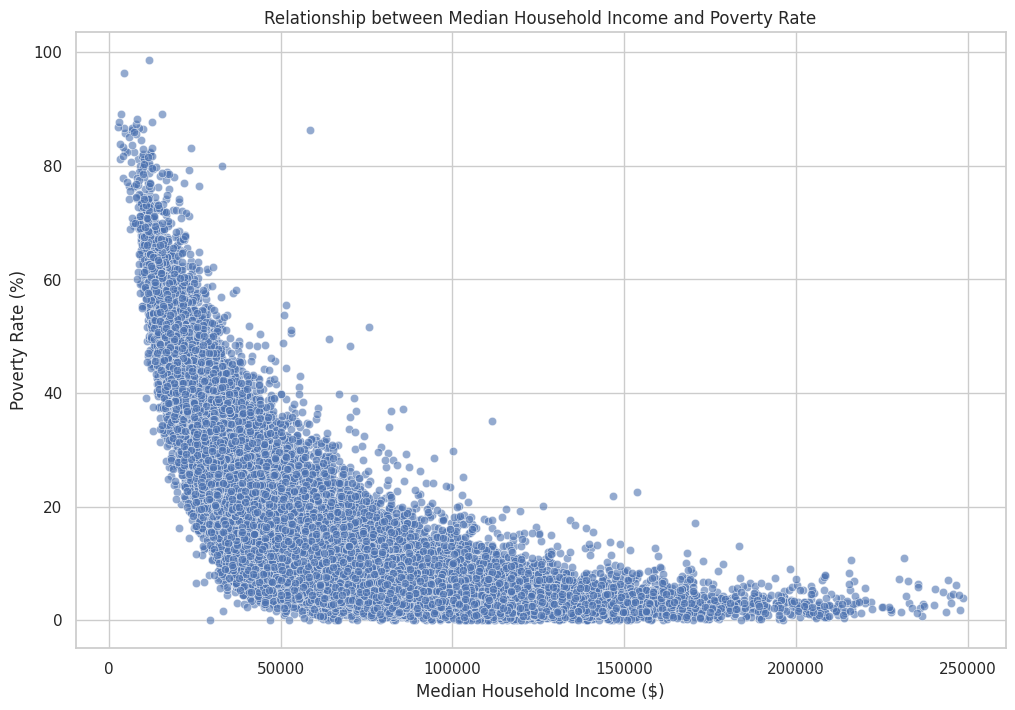

In [12]:
# Create a scatter plot to visualize the relationship between median household income and poverty rates
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Poverty', data=data_2015_tract_cleaned, alpha=0.6)
plt.title('Relationship between Median Household Income and Poverty Rate')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Poverty Rate (%)')
plt.show()

The scatter plot above illustrates the relationship between median household income and poverty rates across the census tracts. As expected, there's a clear negative correlation: tracts with higher median household incomes tend to have lower poverty rates, and vice versa. This trend is consistent with economic theory, where increases in income are generally associated with reductions in poverty.

Next, I'll perform a multivariate analysis to examine the relationship between median household income, poverty rate, and another variable, such as the percentage of residents with a professional occupation. A 3D scatter plot can help us visualize this complex interaction. Let's create that visualization.

In [13]:
# Create a 3D scatter plot to visualize the relationship between income, poverty, and professional occupation percentage
fig = px.scatter_3d(data_2015_tract_cleaned,
                    x='Income',
                    y='Poverty',
                    z='Professional',
                    title='3D Scatter Plot of Income, Poverty Rate, and Professional Occupation Percentage',
                    labels={'Income': 'Median Household Income ($)',
                            'Poverty': 'Poverty Rate (%)',
                            'Professional': 'Professional Occupation (%)'})

fig.show()

I've conducted an exploratory data analysis on the 2015 census tract data, and here's a summary of the insights so far:

**Data Cleaning:** We identified and removed rows with missing values, resulting in a clean dataset with 72,727 entries.

**Univariate Analysis:**

- **Median Household Income:** The distribution is right-skewed, indicating that more census tracts have lower median incomes.
- **Poverty Rates:** Also right-skewed, with a long tail of tracts with high poverty rates.
- **Hispanic Population Percentage:** The median is low but with a wide spread, indicating diverse census tracts in terms of the Hispanic population proportion.

**Bivariate Analysis:**

- We observed a strong negative correlation between median household income and poverty rates, which is expected.

**Multivariate Analysis**

We will perform a multivariate analysis by examining the interactions between three variables: median household income, poverty rate, and the percentage of residents with professional occupations. Since the interactive 3D scatter plot is not working, we will use a pair plot to visualize relationships between these variables and include a density plot for a more detailed view.

**Geospatial Analysis**

The dataset contains geographical identifiers that allow us to analyze data trends based on location. While we can't generate interactive maps due to technical limitations, we can still create static choropleth maps using matplotlib to visualize trends such as poverty rates or median incomes by county or state.

**Anomaly Detection**

We will use statistical methods to detect outliers in key variables. Outliers can be indicative of data entry errors, or they could represent interesting anomalies that are worth investigating further.

Let's start with the multivariate analysis. We'll create a pair plot for median household income, poverty rate, and the percentage of professional occupations.

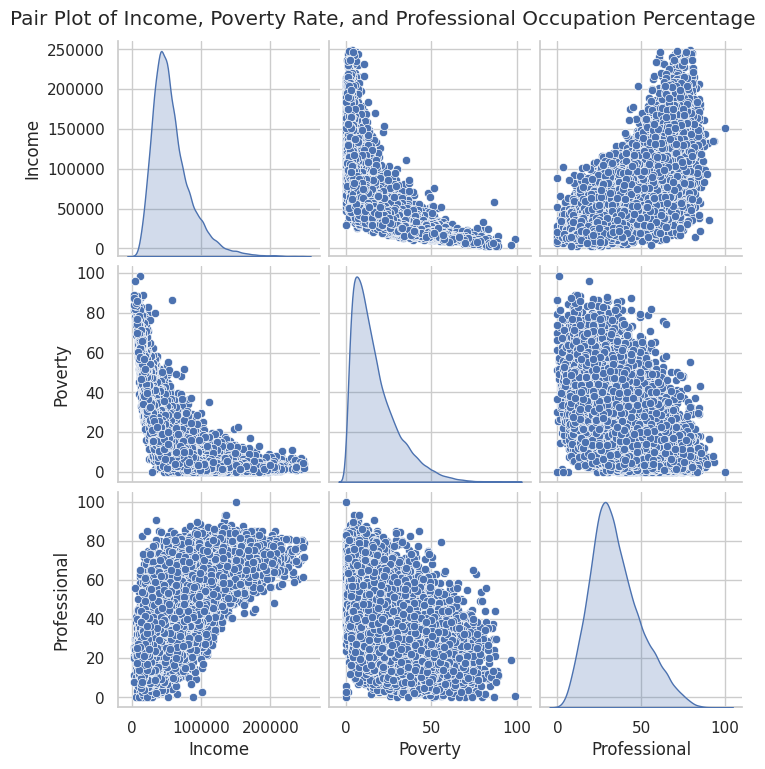

In [14]:
# Select variables for the pair plot
pairplot_data = data_2015_tract_cleaned[['Income', 'Poverty', 'Professional']]

# Create a pair plot with a density plot on the diagonal
sns.pairplot(pairplot_data, diag_kind='kde')
plt.suptitle('Pair Plot of Income, Poverty Rate, and Professional Occupation Percentage', y=1.02)
plt.show()

The pair plot provides a visual summary of the relationships between median household income, poverty rates, and the percentage of professional occupations. The density plots on the diagonal show the distribution of each variable, confirming the right-skewness seen in individual histograms.

From the scatter plots, we observe:

- A negative relationship between income and poverty rate, as previously noted.
- A positive relationship between income and the percentage of professional occupations, suggesting that higher income areas may have more residents employed in professional fields.
- A negative relationship between the percentage of professional occupations and poverty rate, which aligns with the idea that areas with higher professional employment tend to have lower poverty rates.

Next, we'll perform a geospatial analysis. Given the constraints of our current environment, we'll create static visualizations of geographical trends. We'll focus on state-level aggregates, which should provide a clear picture of regional differences in median incomes and poverty rates.

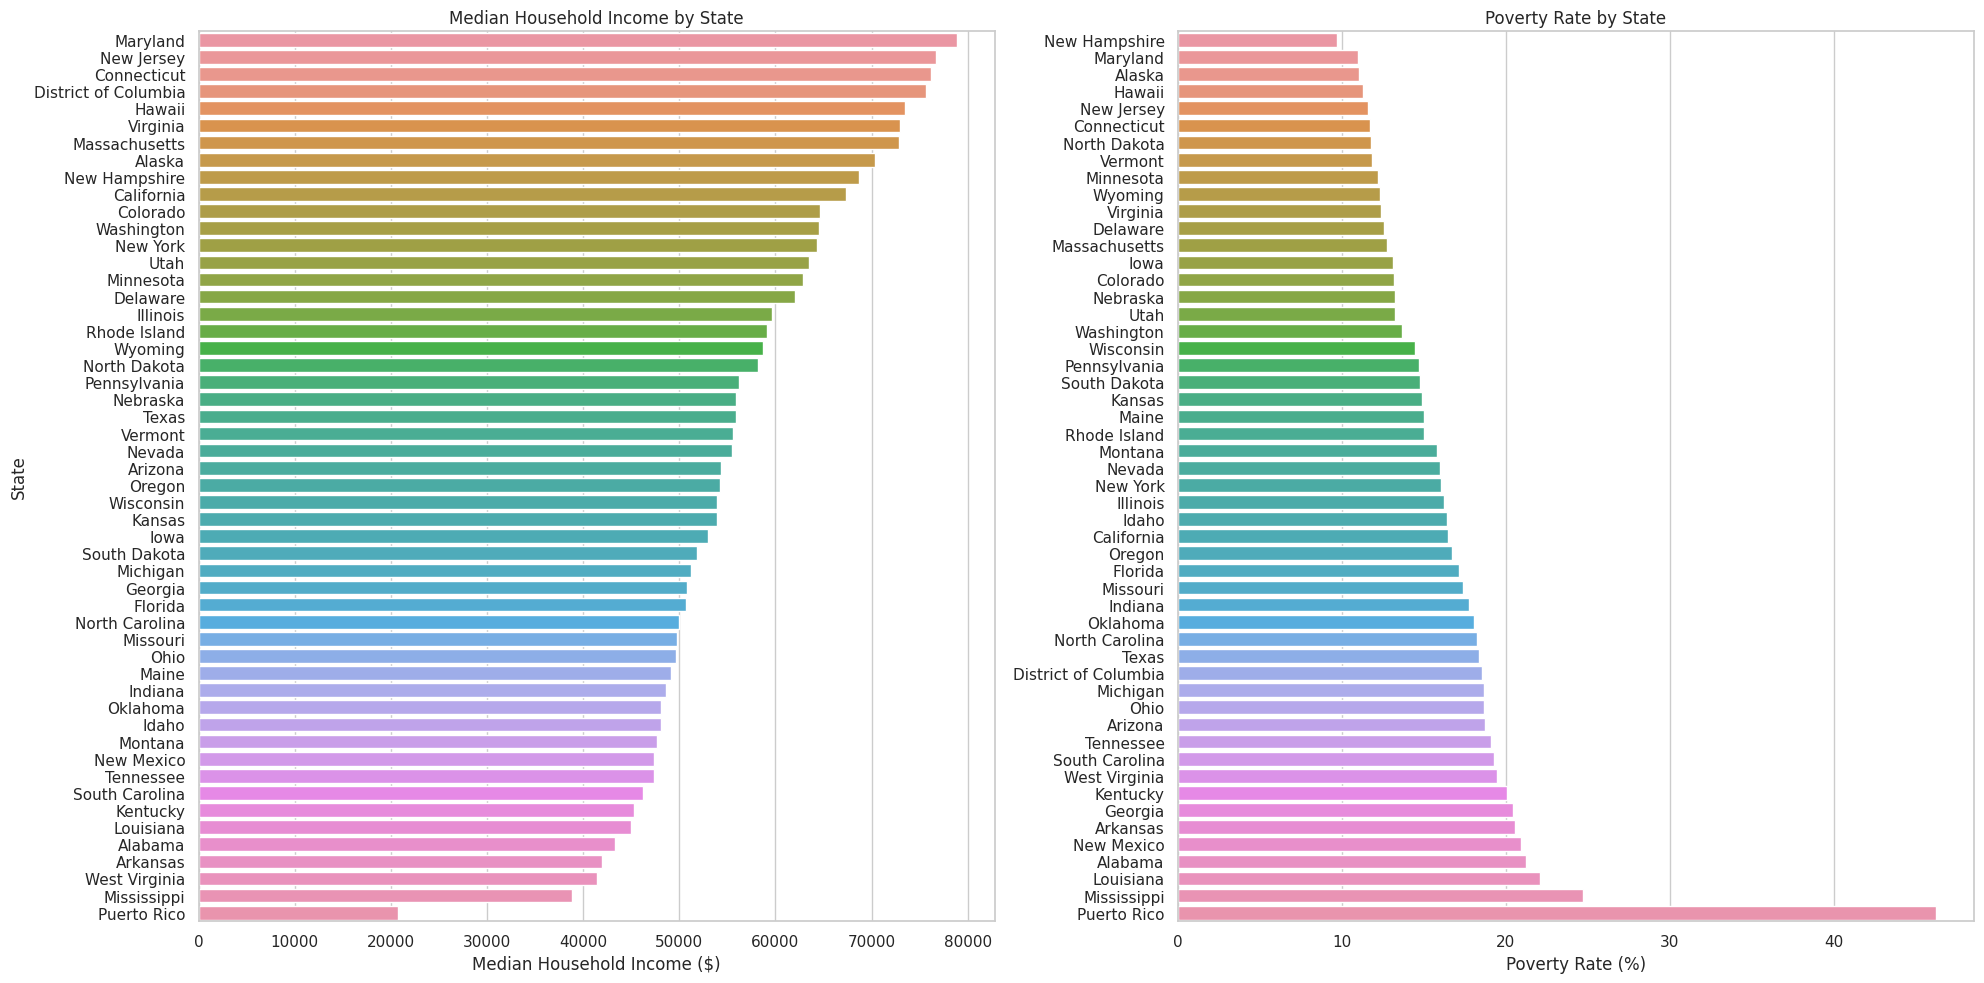

In [15]:
# Group data by State to get the mean values for 'Income' and 'Poverty'
state_data = data_2015_tract_cleaned.groupby('State')[['Income', 'Poverty']].mean().reset_index()

# Now we will visualize these aggregates using bar plots
# We will create two plots side by side for median income and poverty rate by state

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Sort the states by median income and poverty rate for better visualization
state_data_sorted_income = state_data.sort_values('Income', ascending=False)
state_data_sorted_poverty = state_data.sort_values('Poverty', ascending=True)

# Median Income by State
sns.barplot(x='Income', y='State', data=state_data_sorted_income, ax=ax[0])
ax[0].set_title('Median Household Income by State')
ax[0].set_xlabel('Median Household Income ($)')
ax[0].set_ylabel('State')

# Poverty Rate by State
sns.barplot(x='Poverty', y='State', data=state_data_sorted_poverty, ax=ax[1])
ax[1].set_title('Poverty Rate by State')
ax[1].set_xlabel('Poverty Rate (%)')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

The bar plots above show the mean median household income and poverty rates aggregated by state:

- The left plot ranks states by median household income, with states at the top having the highest mean incomes across their census tracts. This provides a clear view of which states are wealthier on average.
- The right plot ranks states by poverty rates in ascending order, showing states with lower average poverty rates at the top. This plot helps us identify which states have, on average, lower levels of poverty.
- The visual comparison between the two plots can reveal contrasts, such as states that have high median incomes but also higher poverty rates, or vice versa.

Finally, let's address anomaly detection. We will identify outliers in the dataset, particularly looking at variables such as income and poverty rates. For this, we'll use the z-score method, which measures the number of standard deviations an observation is from the mean. Values with a z-score above 3 or below -3 are often considered outliers. Let's calculate these z-scores for the income and poverty rate columns.

In [16]:
from scipy import stats

# Calculate z-scores for 'Income' and 'Poverty'
data_2015_tract_cleaned['Income_Zscore'] = stats.zscore(data_2015_tract_cleaned['Income'])
data_2015_tract_cleaned['Poverty_Zscore'] = stats.zscore(data_2015_tract_cleaned['Poverty'])

# Filter out outliers based on z-score
income_outliers = data_2015_tract_cleaned[(data_2015_tract_cleaned['Income_Zscore'] > 3) | (data_2015_tract_cleaned['Income_Zscore'] < -3)]
poverty_outliers = data_2015_tract_cleaned[(data_2015_tract_cleaned['Poverty_Zscore'] > 3) | (data_2015_tract_cleaned['Poverty_Zscore'] < -3)]

(income_outliers[['State', 'County', 'Income', 'Income_Zscore']], poverty_outliers[['State', 'County', 'Poverty', 'Poverty_Zscore']])

<ipython-input-16-bf602fea5fb2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-bf602fea5fb2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(            State                  County    Income  Income_Zscore
 1234       Alaska  Anchorage Municipality  152018.0       3.305876
 1235       Alaska  Anchorage Municipality  147250.0       3.139533
 1237       Alaska  Anchorage Municipality  165067.0       3.761119
 1711      Arizona                Maricopa  153819.0       3.368708
 1712      Arizona                Maricopa  159107.0       3.553191
 ...           ...                     ...       ...            ...
 70253  Washington                    King  199542.0       4.963857
 70254  Washington                    King  147750.0       3.156977
 70285  Washington                  Kitsap  150769.0       3.262302
 72278   Wisconsin               Milwaukee  150750.0       3.261639
 72280   Wisconsin               Milwaukee  156250.0       3.453518
 
 [1135 rows x 4 columns],
              State     County  Poverty  Poverty_Zscore
 82         Alabama    Calhoun     62.1        3.491536
 246        Alabama     Dallas     59.4     

**Anomaly Detection Results:**
**Income Outliers:**
We found 1,135 census tracts with incomes significantly higher or lower than the average, with z-scores exceeding 3 or falling below -3. These tracts are spread across various states and counties, with some notable high-income outliers in Alaska, Arizona, and Washington, among others.
**Poverty Outliers:**
There are 1,015 census tracts with poverty rates that are outliers, also with z-scores above 3 or below -3. These are areas with unusually high poverty rates compared to the rest of the dataset. Notable examples include tracts in Alabama, Jefferson, and Puerto Rico.
These outliers could be due to a number of factors, such as being located in extremely wealthy or poor areas, or they could be due to errors in data collection or entry. Further investigation would be required to determine the exact reasons for these anomalies.

This concludes our exploratory data analysis. We've cleaned the data, examined distributions and relationships, visualized geographic trends, and identified outliers. This analysis provides a comprehensive understanding of the dataset and highlights areas for potential further investigation or action.

**The data preparation and processing steps** were incorporated into the exploratory data analysis (EDA) process. Here's a summary of what we've done in terms of data preparation and processing:

**Initial Data Assessment:**

- We began by examining the structure of the dataset, identifying data types, and the presence of missing values.

**Data Cleaning:**

- We identified missing values across various columns. Since the missing values were less than 5% in all columns, we chose to remove rows with any missing values to maintain data integrity.
- This step was crucial to ensure that the subsequent analysis was based on complete cases without missing information.

**Data Transformation:**

- Although we did not perform explicit feature transformations such as normalization or scaling (which are typically needed for machine learning models), we did calculate z-scores for income and poverty rates to identify outliers.
- The calculation of z-scores is a form of data standardization, where we measured the number of standard deviations away from the mean for each data point.

**Data Aggregation:**

- For the geospatial analysis, we aggregated the data by state to calculate the average income and poverty rates, which allowed us to compare these metrics across states.

**Anomaly Detection:**

- We conducted anomaly detection as part of data processing to identify outliers in the dataset. This is a form of data quality assurance to highlight potential data entry errors or exceptional cases that may warrant further investigation.

**Visualization Preparation:**

- For each visualization, we prepared the data accordingly, selecting relevant columns and summarizing or sorting the data as needed to produce clear and informative plots.

These steps constitute the data preparation and processing phase and were performed in conjunction with the EDA to ensure that the analysis was done on a clean and well-understood dataset.